In [2]:
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from neo import io
import quantities as pq

mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

1. make a list of file names
2. Present graph to user; get user to select events with automated clicker (follow tutorial)


Can also make this do the amplitude measurements

In [3]:
def read_file(filepath):
    '''Reads in one WinEDR recording. Returns current and time'''
    r = io.WinEdrIO(filename=filepath)
    seg = r.read_segment(lazy=False, cascade=True,)
    I = seg.analogsignals[0]
    time = seg.analogsignals[0].times
    return (I, time)

In [29]:
#plt.figure(figsize=(20,3))
#plt.plot(time[0:20000], I[0:20000])


def convert(sec, sampling_rate=1000):
    '''Converts time(s) to number of samples'''
    return sec*sampling_rate

def section(from_s, to_s,  time_array, data_array, sampling_rate=1000):
    '''Takes a slice of recording defined by start and end times (from_s, to_s)'''
    return(time_array[convert(from_s):convert(to_s)], data_array[convert(from_s):convert(to_s)])

def plot_section(from_s, to_s, time_array, data_array, sampling_rate=1000,):
    '''Plots a section of recording defined by start and end times (from_s, to_s)'''
    plt.xlabel('Time (s)')
    plt.ylabel('Current (pA)')
    plt.title('Filename: %s' %filename)
    return plt.plot(time_array[convert(from_s):convert(to_s)], data_array[convert(from_s):convert(to_s)])


In [74]:
# read in the information about waveforms

df = pd.read_excel('C://Users//cdixon//Documents//DataSynaptopathies//2017Electrophysiology/825RigBackup/GluR2_KA_summary211118.xlsx',
                              sheetname='Hom_figures_choose')

df = df[['Filename', 'Date', 'Mutant','Centre of waveform (s)']].dropna()

In [75]:
df

,Filename,Date,Mutant,Centre of waveform (s)
3,171221_011,171221,A639S,26.0
23,190228_004,190228,D302G,13.0
124,190219_001,190219,Q607E,36.6
125,190307_002,190307,Q607E,5.1
145,171222_015,171222,V647L,93.7
178,190228_003,190228,WT,134.0


In [94]:
class Waveform:
    def __init__(self, filename, centre, mutant):
        start = int(centre - 3000)
        end = int(centre + 3000) 
        I, t = read_file(filename)
        self.I = I.magnitude[start:end]
        self.t = t.magnitude[start:end]
        self.mutant = mutant
        baseline = self.I[start:start+200].mean()
        self.I = self.I - baseline
    

KeyboardInterrupt: 

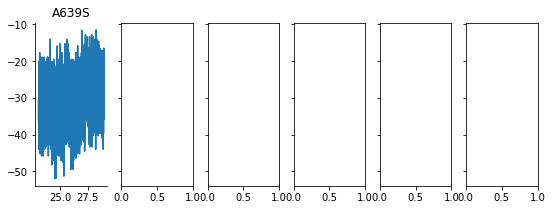

In [93]:
# Need to convert this to an axis; make them share the axes

#fig, axs = plt.subplots(1, 6, sharey='row', figsize=(12,2)) 
#fig = plt.figure(figsize=(12,2))
fig, axs = plt.subplots(1, 6, figsize=(9, 3), sharey=True)

for i in range(len(df)):
    mutant = df.iloc[i, 2]
    filename = df.iloc[i,0] + '.EDR'
    centre = df.iloc[i,3]*1000
    start = int(centre - 3000)
    end = int(centre + 3000)
    I, t = read_file(filename)
    axs[i].plot(t.magnitude[start:end],I.magnitude[start:end])
    axs[i].set_title(mutant)
    axs[i].spines['right'].set_color('none')
    axs[i].spines['top'].set_color('none')
plt.show()

    
    